# MODELOS EVOLUTIVOS

Testamos dois algoritmos genéticos para o projeto Pacman. O jogo foi desenvolvido por pesquisadores da Universidade de Berkeley, John DeNero, Dan Klein, Pieter Abbeel, e outros. A seguir, mostramos cada um desses algoritmos e suas premissas.

# 1. Algoritmo Genético 1

## 1.1 Ficha-Resumo:

• <b>Modelo adotado:</b> Algotirmo Genético Modificado;<br>
• <b>Gene:</b> Lista com 5 floats entre 0 e 100; <br>
• <b>Chromossomo:</b> 1000 genes em um vetor; <br>
• <b>Função Fitness:</b> Score do jogo; <br>
• <b>Tamanho da População:</b> 20 indivíduos; <br>
• <b>População inicial:</b> Escolha alheatória com distribuição uniforme; <br>
• <b>Critério de Parada: </b> 100 gerações;<br>
• <b>Técnica de Seleção:</b> Torneio com 4 indivíduos; <br>
• <b>Técnica de Crossover:</b> Double point com a troca de 100 genes; <br>
• <b>Técnica de Mutação:</b> Swap; <br>
• <b>Método de Replacement:</b>Steady State (5 melhores da pop anterior e n-5 melhores da pop intermediaria) ; <br>
• <b>Taxa de Mutação:</b> 10%; <br>
• <b>Taxa de Crossover:</b> 80%; <br>

## 1.2 Explicação:


 
### 1.2.1 Gene:
Abaixo, apresentamos um fluxograma para um estado, com um gene de um agente para este estado, contendo uma lista de 5 pesos que variam de 0 a 100. Cada peso irá multiplicar o output de uma função do agente que retorna um dicionário com as direções. Cada direção conterá um valor calculado por uma idéia de distância heurística que definimos e que explicaremos a seguir. A ideia é que os pesos definam a importância do output (as direções) de cada função para a tomada de descisão do agente para a próxima direção.

Após definir a próxima direção, o agente checa se essa direção é possível. Se for, ele move-se à ela, se não, escolhemos a segunda direção ótima. E novamente checamos se é possível realizá-la, e continuamos o processo até encontrar uma direção possível. Após mover-se para um novo estado, o agente recebe um novo gene, ou seja, um novo conjunto de pesos para ponderar o output das funções, e assim o processo se repete até que o jogo acabe, ou que o limite de 1000 ações (1000 genes que definem os pesos para a tomada de decisões do agente em cada estado) seja atingido. Se atingirmos esse limite, o agente pára e espera algum fantasma o encontrar.
<img height="500px" class="center-block" src="assets/pacman.jpeg">



### 1.2.2 Distância Heurística do agente para os fantasmas:

Como exemplo, imaginemos que nosso agente se encontra na posição (3,3) do grid e existe um fantasma na posição (6,5), como mostrado na Figura 1. Nossa função de distância heurística checa o maior eixo do fantasma em relação ao pacman e vota para ir na distância oposta ao fantasma. Se tivermos dois fantasmas, como na figura 2, fazemos o mesmo processo, calculamos o maior eixo de distância do fantasma ao pacman e votamos para as direções opostas.
<br>
<br>
<br>

<div class="row">
  <div class="col-md-6" markdown="1">
   Figura 1. Pacman e um fantasma
  <img height="500px" class="center-block" src="assets/pac1.jpg">
  </div>
  <div class="col-md-6" markdown="1">
   Figura 2. Votando na direção para dois fantasmas
  <img height="500px" class="center-block" src="assets/pac2.jpg">
  </div>    
   <div class="col-md-12" markdown="1">
        Caso tivermos um terceiro fantasma cuja distância dos eixos são iguais, então votamos para as duas direções opostas ao fantasma, como podemos conferir na imagem abaixo. No exemplo, nossa função de distância para todos os fantasmas retornaria um dicionário com as seguintes direções <i>{'North':0,'East':1,'South':2,'West':1},</i> que nada mais é do que somar cada voto para cada direção.
       Desse dicionário, multiplicamos o peso para esta função, definido pela posição na lista de pesos do gene.
       <br><br>
       Figura 3. Votação final fantasmas
   <img height="400px" class="center-block" src="assets/pac3.jpg">
   </div>
</div>
<br>


### 1.2.3 Distância Heurística do agente por comida:
Já para comida, nosso agente utiliza uma estratégia um pouco diferente. Primeiro, consideramos que o agente  estará sempre na posição (0,0). Além disso, ele se preocupa apenas com as comidas que estão dentro de um quadrado, que se inicia com lado de tamanho 4 unidades, como demonstrado na figura 4. Se não encontramos nenhuma comida, o lado do quadrado aumenta em duas unidades, como na figura 5. Caso ainda nosso agente não encontre comida, o processo se repete até 15 tentativas.

Ao encontrar comida, calculamos a mesma distância heurística que utilizamos para os fantasmas, porém agora nosso algoritmo vota para a direção a favor da comida, e não na direção oposta, como era feito com os fantasmas.
<br>
<br>
<br>
<div class="row">
 <div class="col-md-5" markdown="1">
Figura 4. Quadrado de busca inicializado com lado 4.
  
  </div>
  <div class="col-md-1" markdown="1">
      
  </div>

  <div class="col-md-5" markdown="1">
 Figura 5. Expansão do quadrado e cálculo das distâncias
  </div>
 
    
    
  <div class="col-md-5" markdown="1">

  <img height="500px" class="center-block" src="assets/pac4.jpg">
  </div>
  <div class="col-md-1" markdown="1">
      
  </div>

  <div class="col-md-5" markdown="1">
  <img height="500px" class="center-block" src="assets/pac5.jpg">
  </div>
</div>

### 1.2.3 Definindo a próxima posição baseado em todas as funções:
É importante salientar que o quadrado só serve para comida. Ou seja, mesmo que um fantasma não se encontre dentro do quadrado, a direção oposta à sua posição entrará na votação. Na figura 6 apresentamos a votação para todas as funções que realizamos. É importante lembrar que para cada função (distância da comida mais próxima, distância para todas as comidas dentro do quadrado, distância de todos os fantasmas, distância do fantasma mais próximo e a próxima jogada que apresente o maior score momentâneo), essa votação das direções será ponderada por um peso que o gene traz para cada função. 
<br>
<br>
<div class="col-md-12" markdown="1">
   Figura 6. Votação final
   <img height="200px" class="center-block" src="assets/pac6.jpg">
   </div>
<br>
<br>

## 1.3 Análise dos Resultados:


## 1.x CÓDIGO:
### 1.x.1 Definição do agente do jogo Pacman

Baseamos nossa escolha de agente como um pacman que decide o próximo passo a ser dado ao analisar em seu estado atual qual a posição de todos os fantasmas, do fantasma mais próximo, das comidas dentro de um raio e da comida mais próxima.

In [15]:
from pacman import GameState,readCommand
from collections import Counter
from game import Agent
from game import Directions
from util import manhattanDistance
from heuristic import heuristicDistance
import seaborn as sns
import pacman
import random
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

class theBestAgentOnEarth(Agent):
    '''O melhor agente da Terra que recebe pesos para a relevância de funções de busca, como
    a posição da melhor comida, do fantasma mais próximo, etc, para calcular o próximo passo do Agente'''
    
    def __init__(self,weights):
        self.weights = weights
        
    def registerInitialState(self, state):
        return    
    
    
    
    def getAction(self,state):
        
        def dirComida(state,weight1,weight2,lado_quadrado):
            '''Função que recebe dois pesos e um número. Ela verifica por comida num quadrado em torno do pacman.
            A função recebe o tamanho do lado do quadrado. Ela retorna a direção em que mais comidas estão nesse
            quadrado (Oeste,Leste,Norte, Sul), ponderada pelo peso 1 e a direção da comida mais próxima ponderada
            pelo peso 2.'''
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            best_east=best_west=best_north=best_south=0 #inicializando as variaveis para as direções
                                                        #da comida mais próxima
            near_x=near_y=0
            near_food=10000
            #Cria o quadrado ladoxlado em volta do pacman para checar se tem comida e qual a direção da comida
            for eixo_x in range(int(-(lado_quadrado/2)),int((lado_quadrado/2)+1)):
                for eixo_y in range(int(-(lado_quadrado/2)),int((lado_quadrado/2)+1)):
                    try:
                        #Se tem muro, vai para outro quadrado
                        if state.hasWall(state.getPacmanPosition()[0]+eixo_x,state.getPacmanPosition()[1]+eixo_y):
                            continue
                        else:
                            #Se não tem muro, atualiza o x e y do quadrado
                            x = state.getPacmanPosition()[0]+eixo_x
                            y = state.getPacmanPosition()[1]+eixo_y
                            has_food = state.getFood()[x][y]
                            #Verifica se tem comida no quadrado e adiciona a direção mais forte(sul,norte,leste,oeste)
                            if has_food:
                                #Ve se é a comida mais proxima, se for irá armazenar as direções para o weight 2
                                #Utilizamos a distância de Manhattan pra ver qual comida é a mais próxima
                                dist=manhattanDistance(state.getPacmanPosition(),[x,y])
                                if dist<near_food:
                                    near_food=dist
                                    near_x= x
                                    near_y= y
                                    #Aqui vereficamos o maior eixo e o sinal. Se for,por exemplo, eixo x e sinal 
                                    #positivo, será direção oeste. Se for o mesmo eixo e sinal contrário, será 
                                    #direção este. Do mesmo modo se o eixo y for o maior, será norte se for
                                    #positivo e sul se for negativo
                                    if abs(eixo_x)>abs(eixo_y) and eixo_x<0:
                                        best_west = 0
                                        best_west += 1
                                    elif abs(eixo_x)>abs(eixo_y) and eixo_x>0:
                                        best_east=0
                                        best_east += 1
                                    elif abs(eixo_y)>abs(eixo_x) and eixo_y<0:
                                        best_south=0
                                        best_south += 1
                                    elif abs(eixo_y)>abs(eixo_x) and eixo_y>0:
                                        best_north=0
                                        best_north += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x>0:
                                        best_north=best_east=0
                                        best_north += 1
                                        best_east += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x<0:
                                        best_north=best_west=0
                                        best_north += 1
                                        best_west += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x>0:
                                        best_south=best_east=0
                                        best_south += 1
                                        best_east += 1
                                    elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x<0:
                                        best_south=best_west=0
                                        best_south += 1
                                        best_west += 1
                                #Depois de vermos se é a comida mais próxima, agora checamos a mesma coisa para
                                #as demais comidas. Mesmo se for a comida mais próxima, ela entrará na conta da
                                #comida total.
                                if abs(eixo_x)>abs(eixo_y) and eixo_x<0:
                                    west += 1
                                elif abs(eixo_x)>abs(eixo_y) and eixo_x>0:
                                    east += 1
                                elif abs(eixo_y)>abs(eixo_x) and eixo_y<0:
                                    south += 1
                                elif abs(eixo_y)>abs(eixo_x) and eixo_y>0:
                                    north += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x>0:
                                    north += 1
                                    east += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y>0 and eixo_x<0:
                                    north += 1
                                    west += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x>0:
                                    south += 1
                                    east += 1
                                elif abs(eixo_y)==abs(eixo_x) and eixo_y<0 and eixo_x<0:
                                    south += 1
                                    west += 1                            
                    except:
                        continue
                        
            #Agora que fizemos a contagem das direções, a função retorna
            #dois dicionários, um para a comida mais próxima e outro para o total de comidas.
            # Cada dicionário contém todas as direções como keys e a contagem das direções, já ponderada
            #pelo reespectivos pesos, 1 e 2 (Peso 1 para a comida total e peso 2 para a comida mais próxima).
            actions_count_all={'East':weight1*east,'West':weight1*west,'North':weight1*north,'South':weight1*south}
            
            actions_count_near={'East':weight2*best_east,'West':weight2*best_west,
                                'North':weight2*best_north,'South':weight2*best_south}
            return actions_count_all , actions_count_near
        
        def futureBestState(state,legal,weight):
            dic = {'East':0,'West':0,'North':0,'South':0}
            score_list = [0,0,0,0]
            for action in dic.keys():
                if action in legal:
                    score = state.generatePacmanSuccessor(action).getScore()
                    dic[action]=score*weight
            return dic
        def dirNearGhost(state,weight):
            '''Função que recebe um peso, verifica pelo fantasma mais perto e retorna direção oposta ponderada
            pelo peso recebido.'''
            
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            numGhost = state.getNumAgents() #Número de fantasmas
            near_dist = 10000 #Estabelecendo um valor de distância alto para ser substituido
            #função que busca o fantasma mais perto, baseado na distância de manhattan
            for ghost in range(1,numGhost):
                dist=manhattanDistance(state.getPacmanPosition(),state.getGhostPosition(ghost))
                if dist<near_dist:
                    near_dist=dist
                    near_ghost=ghost
            #Selecionamos agora a direção do fantasma mais proximo
            x,y=heuristicDistance(state.getPacmanPosition(),state.getGhostPosition(near_ghost))
            #Aqui inevertemos a melhor direção, para o pacman ir para uma direção oposta do fantasma
            if abs(x)>abs(y):
                if x>0:
                    east += 1
                else:
                    west += 1
                    
            elif abs(x)==abs(y):
                if x>0:
                    east += 1
                    north += 1
                else:
                    west += 1
                    south += 1
            else:
                if y>0:
                        north += 1
                else:
                        south += 1
            #Retornamos um dicionário com todas as direções como key e a contagem, já ponderada pelo peso,
            #como values                         
            actions_count={'East':weight*east,'West':weight*west,'North':weight*north,'South':weight*south}
            return actions_count
         
        def dirAllGhost(state,weight):
            '''Função que recebe um peso, verifica os fantasmas e retorna a direção oposta da somatória dos fantasmas
            ponderada pelo peso passado na função.'''
           
            east=west=north=south=0 #inicializando as variaveis para contar as direções mais frequentes
            numGhost = state.getNumAgents() #Número de fantasmas. Sabemos que o pacman é contado aqui, mas não importa
                                            # porque na função range() utilizada abaixo começamos no 1, e não no zero

            for ghost in range(1,numGhost):
                x,y=heuristicDistance(state.getPacmanPosition(),state.getGhostPosition(ghost))
                #Aqui inevertemos a melhor direção, para o pacman ir para uma direção oposta ao do fantasma
                if abs(x)>abs(y):
                    if x>0:
                        east += 1
                    else:
                        west += 1
                    
                elif abs(x)==abs(y):
                    if x>0:
                        east += 1
                        north += 1
                    else:
                        west += 1
                        south += 1
                else:
                    if y>0:
                        north += 1
                    else:
                        south += 1
            #Retornamos um dicionário com todas as direções como key e a contagem, já ponderada pelo peso,
            #como values            
            actions_count={'East':weight*east,'West':weight*west,'North':weight*north,'South':weight*south}
            return actions_count
        
        
        
        #Agora iniciamos a função getAction, retirando um dos cromossomos do indivíduo (cada
        #passo dado pelo indivíduo no jogo, ponderada pelos pesos). Ou seja, o gene contém a lista de pesos
        #para cada uma das funções estabelecidas: peso 1 dado para a melhor direção para comidas, peso dois 
        #para a melhor direção para comida mais próxima, peso três para a direção oposta
        # de todos os fantasmas e direção oposta do fantasma mais próximo.
        
        
        
        if self.weights > 0:
            gene=self.weights.pop(0) #Retira um gene da lista de passos
        else:
            return Directions.STOP
        
        legal = state.getLegalPacmanActions() #Verifica as ações legais do agente
        tentativas=0 #Inicializa a variável de tentativas para achar a melhor direção dado os pesos
        lado_quadrado=2 #Inicializa o tamanho do lado do quadrado do pacman para a busca da comida
        food = state.getNumFood()
        while tentativas<15 and food > 10:#Tenta 15 vezes encontrar alguma direção ou ate faltar 10 comidas
            tentativas+=1 #Vamos contando o número de tentativas
            lado_quadrado+=2 #A cada tentativa, aumentamos o quadrado de busca por comida
            #Vemos o dicionário de ações para a melhor comida e para todas as comidas
            all_food_best_dir, near_food_best_dir = dirComida(state,int(gene[0]),int(gene[1]),lado_quadrado)
            #Vemos o dicionário de ações para o fantasma mais próximo e todos os fantasmas
            all_ghost_best_dir = dirAllGhost(state,int(gene[2]))
            near_ghost_best_dir = dirNearGhost(state,int(gene[3]))
            best_future_action = futureBestState(state,legal,int(gene[4]))
            final = dict(Counter(all_food_best_dir) + Counter(near_food_best_dir) + 
                     Counter(all_ghost_best_dir)+
                     Counter(near_ghost_best_dir)+
                     Counter(best_future_action))
            final = dict(sorted(final.items(), key=lambda item: item[1],reverse=True))
            for i in range(len(final)):
                melhor_direcao = list(final.keys())[i]
                if melhor_direcao in legal:
                    return melhor_direcao
                
                
        #Se nenhuma dessas tentativas derem certo, para evitar erro, retornamos uma direção aleatória dentre
        # as direções legais dos agentes
        all_food_best_dir, near_food_best_dir = dirComida(state,int(gene[0]),int(gene[1]),lado_quadrado)
        best_future_action = futureBestState(state,legal,int(gene[4]))
        final = dict(Counter(near_food_best_dir) + Counter(best_future_action))
        final = dict(sorted(final.items(), key=lambda item: item[1],reverse=True))
        for i in range(len(final)):
            melhor_direcao = list(final.keys())[i]
            if melhor_direcao in legal:
                return melhor_direcao
        final = dict(sorted(near_food_best_dir.items(), key=lambda item: item[1],reverse=True))
        if list(final.keys())[0] in legal:
            return list(final.keys())[0]
        return random.choice(legal)

## Funções para o algoritmo genético

In [16]:
def generateGene():
    '''Função que retorna um gene. Ela gera uma lista com 5 números de 0 a 100 criados aleatoriamente'''
    gene=[]
    for weight in range(0,5):
        gene.append(random.uniform(0, 100))
    return gene
def generateIndividuo():
    '''Função que retorna um indivíduo. Ela gera um indivíduo com 2000 passos, valor suficiente para resolver
    até o layout mais complexo do pacman.'''
    individuo=[]
    for jogadas in range(0,1000):
        individuo.append(generateGene())
    return individuo
def generatePopulation(size):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    population=[]
    for i in range(0,size):
        individuo = generateIndividuo()
        individuo_temp=individuo #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        population.append(individuo)
    return population

def pacmanAvarageScore(individuo,num_tentativas,flag):
    '''Função que recebe o indivíduo, a quantidade de jogos que ele irá realizar e o layout do jogo.
    Ela retorna o score médio da quantidade de jogos realizados para esse indivíduo.'''
    tentativas_ind=[]
    layouts=['smallClassic']
    for layout in layouts:
        for tentativas in range(0,num_tentativas):
            if flag:
                args = ['--layout',layout,'--pacman','DumbAgent','-f','-q']
            else:
                args = ['--layout',layout,'--pacman','DumbAgent','-f']
            args_list = readCommand(args)
            test = theBestAgentOnEarth(individuo)
            score= pacman.runGames(pacman=test,layout=args_list['layout'],ghosts=args_list['ghosts'],display=args_list['display'],
                           numGames=args_list['numGames'],record=args_list['record'])
            tentativas_ind.append(score)
    return np.mean(tentativas_ind)

def evaluatePopulation(population,flag):
    '''Função que recebe o layout do jogo e um tamanho e cria uma população de indivíduos. Ela
    retorna duas listas, a população e os scores de cada indivíduo. O score na posição 0 da lista será do 
    indivíduo da população na posição 0.'''
    scores=[]
    for i in range(0,len(population)):
        print('individuo ',i+1)
        individuo = population[i]
        individuo_temp=deepcopy(individuo) #Passamos para uma variável temporária pois o .pop(0)do getAction
                                    #remove os passos dados dos indivíduos
        avg_score = pacmanAvarageScore(individuo_temp,5,flag)
        scores.append(avg_score)
    return scores

def mutation(population,rate):
    '''Função que recebe uma população e uma taxa e define uma porcentagem da população para realizar mutação
    de cromossomos nos seus indivíduos da essa taxa recebida'''
    for selected in range(int(len(population)*rate)): #Seleciona uma quantidade x de indivíduos, dado a rate
        position_individual = random.randint(0,len(population)-1) #seleciona um indivíduo aleatório na população
        position_cromossom1 = random.randint(0,len(population[position_individual])-1)#Seleciona um cromossomo aleatório
        position_cromossom2 = random.randint(0,len(population[position_individual])-1)#Seleciona outro cromossomo aleatório
        crom1 = population[position_individual][position_cromossom1]
        crom2 = population[position_individual][position_cromossom2]
        
        population[position_individual][position_cromossom1] = crom2
        population[position_individual][position_cromossom2] = crom1
    return population

def torneio(pairs,tournment_size):
    participantes_torneio=[]
    for number in range(tournment_size):
        position_individual = random.randint(0,len(pairs)-1)
        individuo = pairs[position_individual]
        participantes_torneio.append(individuo)
    participantes_torneio.sort(reverse=True, key=lambda li: li[0])
    return participantes_torneio[0]

def crossover(pairs,range_cromossomos,aleatorio):
    '''Função que recebe um pair [score, população] e uma taxa e um range de valores e define uma porcentagem da população
    para realizar crossover desse range de valores (recebido pela função) para os cromossomos dos indivíduos'''
    novos_pares=[]
    for i in range(int((len(pairs)*0.8)/2)): #Para 80% dosindivíduos de individuos na populacao
        
        individual1 = torneio(pairs,4) #seleciona um indivíduo 1 aleatório na população
        individual2 = torneio(pairs,4) #seleciona um indivíduo 2 aleatório na população
        #Apos selecionar as posições dos indivíduos, selecionamos o range de seus primeiros cromossomos     
        crom1_list = individual1[1][aleatorio:aleatorio+range_cromossomos]
        crom2_list = individual2[1][aleatorio:aleatorio+range_cromossomos]
            
        individual1[1][aleatorio:aleatorio+range_cromossomos] = crom2_list
        individual2[1][aleatorio:aleatorio+range_cromossomos] = crom1_list
        novos_pares.append(individual1)
        novos_pares.append(individual2)
    population = [el[1] for el in novos_pares]
    return population

def makePairs(scores,population):
    lista=[]
    for i in range(len(population)):
        item=[scores[i], population[i]]
        lista.append(item)
    lista.sort(reverse=True, key=lambda li: li[0])
    return lista

def mergePopulationAndScores(pairs,pairs_linha):
    pop = pairs[:5] + pairs_linha[:-5]
    population = [el[1] for el in pop]
    scores = [el[0] for el in pop]
    return population, scores

# Main

In [17]:
dic={}
#genetic program procedure
t = 0

# Initialize_Population P(0)
size=20
P = generatePopulation(size)
delta_score = 1
# While not (wall_condition) do
while t <= 300: #delta_score < 0.001 or 
    print('GERAÇÃO',t)
    # Evaluate_Population P(t)
    print('pais:')
    scores = evaluatePopulation(P,flag=True)
    pairs= makePairs(scores,P)
    #Duplicationof the best 25% individuals of P(t)
    pairs_duplication = pairs[:int(len(pairs)*0.2)]
    Pduplication = [el[1] for el in pairs_duplication]
    # P_cross = crossover 80% de P(t) de 100 primeiros genes
    aleatorio = np.random.randint(0,600)
    Pcrossover = crossover(pairs,100,aleatorio)
    #P'(t) = duplication + cross
    
    Plinha = Pcrossover + Pduplication
    
    Plinha = mutation(Plinha,0.1)
    # Evaluate_Population P’
    print('filhos:')
    scores_linha  = evaluatePopulation(Plinha,flag=True)
    pairs_linha = makePairs(scores_linha,Plinha)
    
    # P(t+1) = Select_s survivors P(t) from P '
    P, scores_final = mergePopulationAndScores(pairs,pairs_linha)
    dic[t] = scores_final
    t = t + 1
#End

GERAÇÃO 0
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 1
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individu

individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 15
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 16
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
indivi

individuo  19
individuo  20
GERAÇÃO 29
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 30
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
indiv

individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 44
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 45
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
ind

individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 58
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 59
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
in

individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 73
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 74
pais:
individuo  1
individuo  2
individuo  3


individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 87
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 88
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2

individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 102
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 103
p

individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
GERAÇÃO 116
pais:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10
individuo  11
individuo  12
individuo  13
individuo  14
individuo  15
individuo  16
individuo  17
individuo  18
individuo  19
individuo  20
filhos:
individuo  1
individuo  2
individuo  3
individuo  4
individuo  5
individuo  6
individuo  7
individuo  8
individuo  9
individuo  10


KeyboardInterrupt: 

# Análise dos resultados

In [29]:
best_scores=[]
worst_scores=[]
mean_score=[]
for i in dic.keys():
    best_scores.append(max(dic[i]))
    worst_scores.append(min(dic[i]))
    mean_score.append(sum(dic[i]) / len(dic[i]))

In [30]:
import pandas as pd
df=pd.DataFrame()
df['best'] = best_scores
df['worst'] = worst_scores
df['mean'] = mean_score
df['generations'] = list(dic.keys())

<AxesSubplot:xlabel='best', ylabel='Count'>

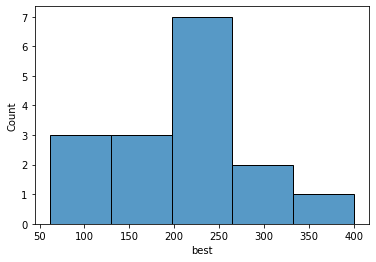

In [31]:
sns.histplot(df.best)

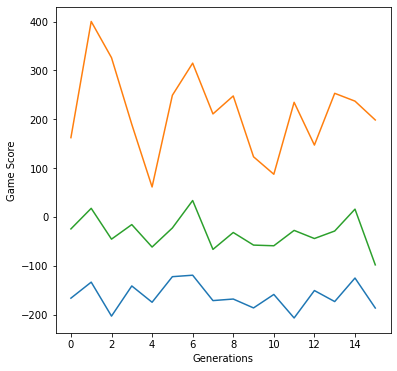

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.lineplot(x='generations', y='worst', data=df)
sns.lineplot(x='generations', y='best', data=df)
sns.lineplot(x='generations', y='mean', data=df)
ax.set(ylabel='Avarage Game Score', xlabel='Generations')
plt.show()

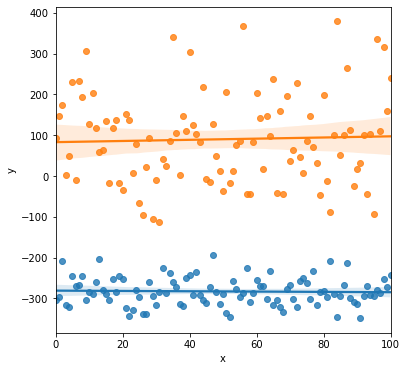

In [10]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# add the plots for each dataframe
sns.regplot(x='generations', y='worst', data=df, fit_reg=True)
sns.regplot(x='generations', y='best', data=df, fit_reg=True)
ax.set(ylabel='y', xlabel='x')
plt.show()

In [11]:
df.to_csv('100_geracoes_small_mutation.csv')